In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE

In [6]:
FullFed = pd.read_csv("Clean Data/FedFull.csv")

In [7]:
FullFed = FullFed.drop(columns='Unnamed: 0')

In [12]:
FullFed.head()

,Name,Fed_AnceProportion,Fed_EduProportion,Fed_AgeAverage,Fed_ChildAverage,Fed_IncAverage,PartyAb
0,Banks,0.273465,0.493383,39.867943,0.606615,646.439758,LNP
1,Barton,0.180501,0.537483,38.589805,0.506451,631.405046,ALP
2,Bennelong,0.265087,0.598456,38.849113,0.527665,736.573384,LNP
3,Berowra,0.435631,0.532653,40.472466,0.658470,793.820798,LNP
4,Blaxland,0.123276,0.427016,35.997921,0.617867,446.488922,ALP


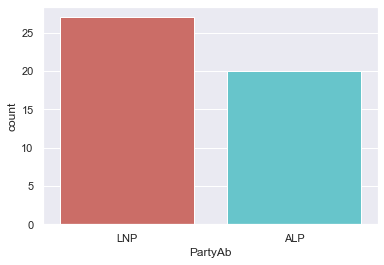

In [28]:
sns.countplot(FullFed['PartyAb'], data = FullFed, palette='hls')
plt.show()

In [33]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
FullFed['PartyAb'] = le.fit_transform(FullFed['PartyAb'])

In [36]:
FullFed.head()

,Name,Fed_AnceProportion,Fed_EduProportion,Fed_AgeAverage,Fed_ChildAverage,Fed_IncAverage,PartyAb
0,Banks,0.273465,0.493383,39.867943,0.606615,646.439758,1
1,Barton,0.180501,0.537483,38.589805,0.506451,631.405046,0
2,Bennelong,0.265087,0.598456,38.849113,0.527665,736.573384,1
3,Berowra,0.435631,0.532653,40.472466,0.658470,793.820798,1
4,Blaxland,0.123276,0.427016,35.997921,0.617867,446.488922,0


In [41]:
reg = linear_model.LogisticRegression()
X_train = FullFed.drop(['Name','PartyAb'],axis = 1)
y_train = FullFed['PartyAb']
reg.fit(X_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
test = pd.read_csv("Clean Data/NSWFull.csv")

In [46]:
test = test.drop(columns='Unnamed: 0')

In [48]:
test.head()

,Name,Ancestry_Proportion,Education_Proportion,Age_Average,Children_Average,Income_Average,Party won
0,Albury,0.561347,0.306550,41.462241,1.957339,787.124060,LNP
1,Auburn,0.102925,0.490746,34.877516,1.503916,690.836679,ALP
2,Ballina,0.580751,0.379375,44.227358,1.780289,789.434557,Green
3,Balmain,0.473518,0.620436,37.889434,0.916856,1282.443970,Green
4,Bankstown,0.131282,0.409595,36.483350,1.800435,630.460980,ALP


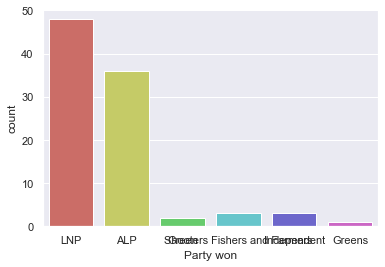

In [59]:
sns.countplot(test['Party won'], data = test, palette='hls')
plt.show()

In [60]:
from sklearn import preprocessing
le2 = preprocessing.LabelEncoder()
test['Party won'] = le2.fit_transform(test['Party won'])

In [61]:
test.head()

,Name,Ancestry_Proportion,Education_Proportion,Age_Average,Children_Average,Income_Average,Party won
0,Albury,0.561347,0.306550,41.462241,1.957339,787.124060,4
1,Auburn,0.102925,0.490746,34.877516,1.503916,690.836679,0
2,Ballina,0.580751,0.379375,44.227358,1.780289,789.434557,1
3,Balmain,0.473518,0.620436,37.889434,0.916856,1282.443970,1
4,Bankstown,0.131282,0.409595,36.483350,1.800435,630.460980,0


In [62]:
X_test = test.drop(['Name','Party won'], axis=1)
y_test = test['Party won']

In [63]:
from sklearn.metrics import accuracy_score
y_pred = reg.predict(X_test)

In [69]:
confusion_matrix(y_test, y_pred)

array([[ 0, 36,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  0],
       [ 0, 48,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  0]], dtype=int64)

In [70]:
accuracy_score(y_test, y_pred)

0.021505376344086023